# 📌 Predictive Model on the Excellent Store

This challenge is to build a predictive model and find out the profit return for each product at a particular store.

# Step 1: Import Libaries

In [1]:
# import necessary libaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the datasets

In [2]:
# loading the dataset
train_df = pd.read_csv("train.csv")  # train dataset
test_df = pd.read_csv("test.csv")   # test dataset

# previewint the first five row of the training dataset to understand the structure of the data
print("The preview of the training dataset:")
display(train_df.head())



The preview of the training dataset:


,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [3]:
# check the dataset shapes
print("The taining dataset shape is:", train_df.shape)
print("The testing dataset shape is:", test_df.shape)

The taining dataset shape is: (4990, 13)
The testing dataset shape is: (3532, 12)


This means the training dataset has 4990 rows and 13 columns, while the testing dataset has 3532 rows and 12 columns


**Variable Description**
- Item_ID: Unique product ID
- Item_Weight: Weight of the product
- Item_Sugar_Content: Sugar content of the product
- Item_Visibility: The percentage of total display area of all products in Chief Babatunji's supermarket allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_Price: Retail price of the product
- Store_ID: Unique store ID
- Store_Start_Year: The year in which store was opened
- Store_Size: The size of the store in terms of total ground area covered
- Store_Location_Type: The type of city in which the store is located
- Store_Type: Description of the store based on category of items sold
- Item_Store_ID: Unique identifier of each product type per supermarket.
- Item_Store_Returns: Profit returns on the product in the particular store. This is the outcome variable to be predicted.


In [4]:
# checking for missing values
train_df.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

# Data Wrangling

This section is about the following:
- Handling missing values
- Information of the dataset
- Converting the categorical columns into numerical values
- dropping irrelevant column

In [5]:
# data information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


so, there are 8 object datatypes, 1 integer datatypes, and 4 float64 datatypes

In [6]:
#handling missing values
# calculate the mean of the item weight
avg_weight = train_df["Item_Weight"].astype("float").mean(axis=0)
print("The average of the item weight is:", avg_weight)

The average of the item weight is: 12.90883834765998


In [7]:
# repalce every missing values in the weight cloumns with the mean
train_df["Item_Weight"].replace(np.nan, avg_weight, inplace=True)

In [8]:
train_df["Store_Size"].value_counts().idxmax()

'Medium'

In [9]:
# replacing every NaN in store size with the maximum value
train_df["Store_Size"].replace(np.nan, "Medium", inplace=True)

In [10]:
# let check if the missing values has been handled
train_df.isnull().sum()

Item_ID                0
Store_ID               0
Item_Store_ID          0
Item_Weight            0
Item_Sugar_Content     0
Item_Visibility        0
Item_Type              0
Item_Price             0
Store_Start_Year       0
Store_Size             0
Store_Location_Type    0
Store_Type             0
Item_Store_Returns     0
dtype: int64

In [11]:
# checking for duplicates
train_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4985    False
4986    False
4987    False
4988    False
4989    False
Length: 4990, dtype: bool

# Exploratory Data Analysis

In [12]:
train_df.columns
train_df.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.308671,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,9.300000,0.027273,307.890000,1994.000000,2757.660000
50%,12.908838,0.053564,393.860000,2006.000000,5374.675000
75%,16.250000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [13]:
profit_type = train_df.groupby("Item_Type", observed=True)["Item_Store_Returns"].mean().sort_values()
print("\nThe profit rate by item type is:\n", profit_type)

train_df['Weight_Bin'] = pd.cut(train_df['Item_Weight'], bins=[0, 5, 10, 15, 25], labels=["Very Low","Low","High","Very High"])
profit_weight = train_df.groupby("Weight_Bin", observed=True)["Item_Store_Returns"].mean().sort_values()
print("\nThe profit rate by weight bin is:\n", profit_weight)

train_df['Price_Bin'] = pd.cut(train_df['Item_Price'], bins=[0, 150, 300, 450, 700], labels=["Very Low","Low","High","Very High"])
profit_price = train_df.groupby("Price_Bin", observed=True)["Item_Store_Returns"].mean().sort_values()
print("\nThe profit rate by price bin is:\n", profit_price)

profit_year = train_df.groupby("Store_Start_Year", observed=True)["Item_Store_Returns"].mean().sort_values()
print("\nThe profit rate by Store start year is:\n", profit_year)

profit_size = train_df.groupby("Store_Size", observed=True)["Item_Store_Returns"].mean().sort_values()
print("\nThe profit rate by store size is:\n", profit_size)

profit_location_type = train_df.groupby("Store_Location_Type", observed=True)["Item_Store_Returns"].mean().sort_values()
print("\nThe profit rate by store location type is:\n", profit_location_type)

profit_store_type = train_df.groupby("Store_Type", observed=True)["Item_Store_Returns"].mean().sort_values()
print("\nThe profit rate by store type is:\n", profit_store_type)

profit_sugar_content = train_df.groupby("Item_Sugar_Content", observed=True)["Item_Store_Returns"].mean().sort_values()
print("\nThe profit rate by item sugar content is:\n", profit_sugar_content)

train_df['Visibility_Group'] = pd.cut(train_df['Item_Visibility'], bins=[0.0, 0.1, 0.2, 0.3, 0.4], labels=["Very Low","Low","High","Very High"])
profit_Visibility = train_df.groupby("Visibility_Group", observed=True)["Item_Store_Returns"].mean().sort_values()
print("\nThe profit rate by visibility bin is:\n", profit_Visibility)




The profit rate by item type is:
 Item_Type
Health and Hygiene       5398.071661
Others                   5563.342500
Baking Goods             5651.602384
Hard Drinks              6008.088060
Frozen Foods             6019.509694
Soft Drinks              6027.084636
Meat                     6083.956023
Breads                   6099.311168
Breakfast                6116.382424
Household                6152.931975
Canned                   6207.660346
Dairy                    6208.870829
Snack Foods              6259.001478
Fruits and Vegetables    6363.695703
Seafood                  6403.860244
Starchy Foods            7011.018272
Name: Item_Store_Returns, dtype: float64

The profit rate by weight bin is:
 Weight_Bin
Low          5673.540842
Very High    5797.778767
Very Low     6199.454857
High         6650.148011
Name: Item_Store_Returns, dtype: float64

The profit rate by price bin is:
 Price_Bin
Very Low     1125.715572
Low          3457.394956
High         5783.160982
Very High    8

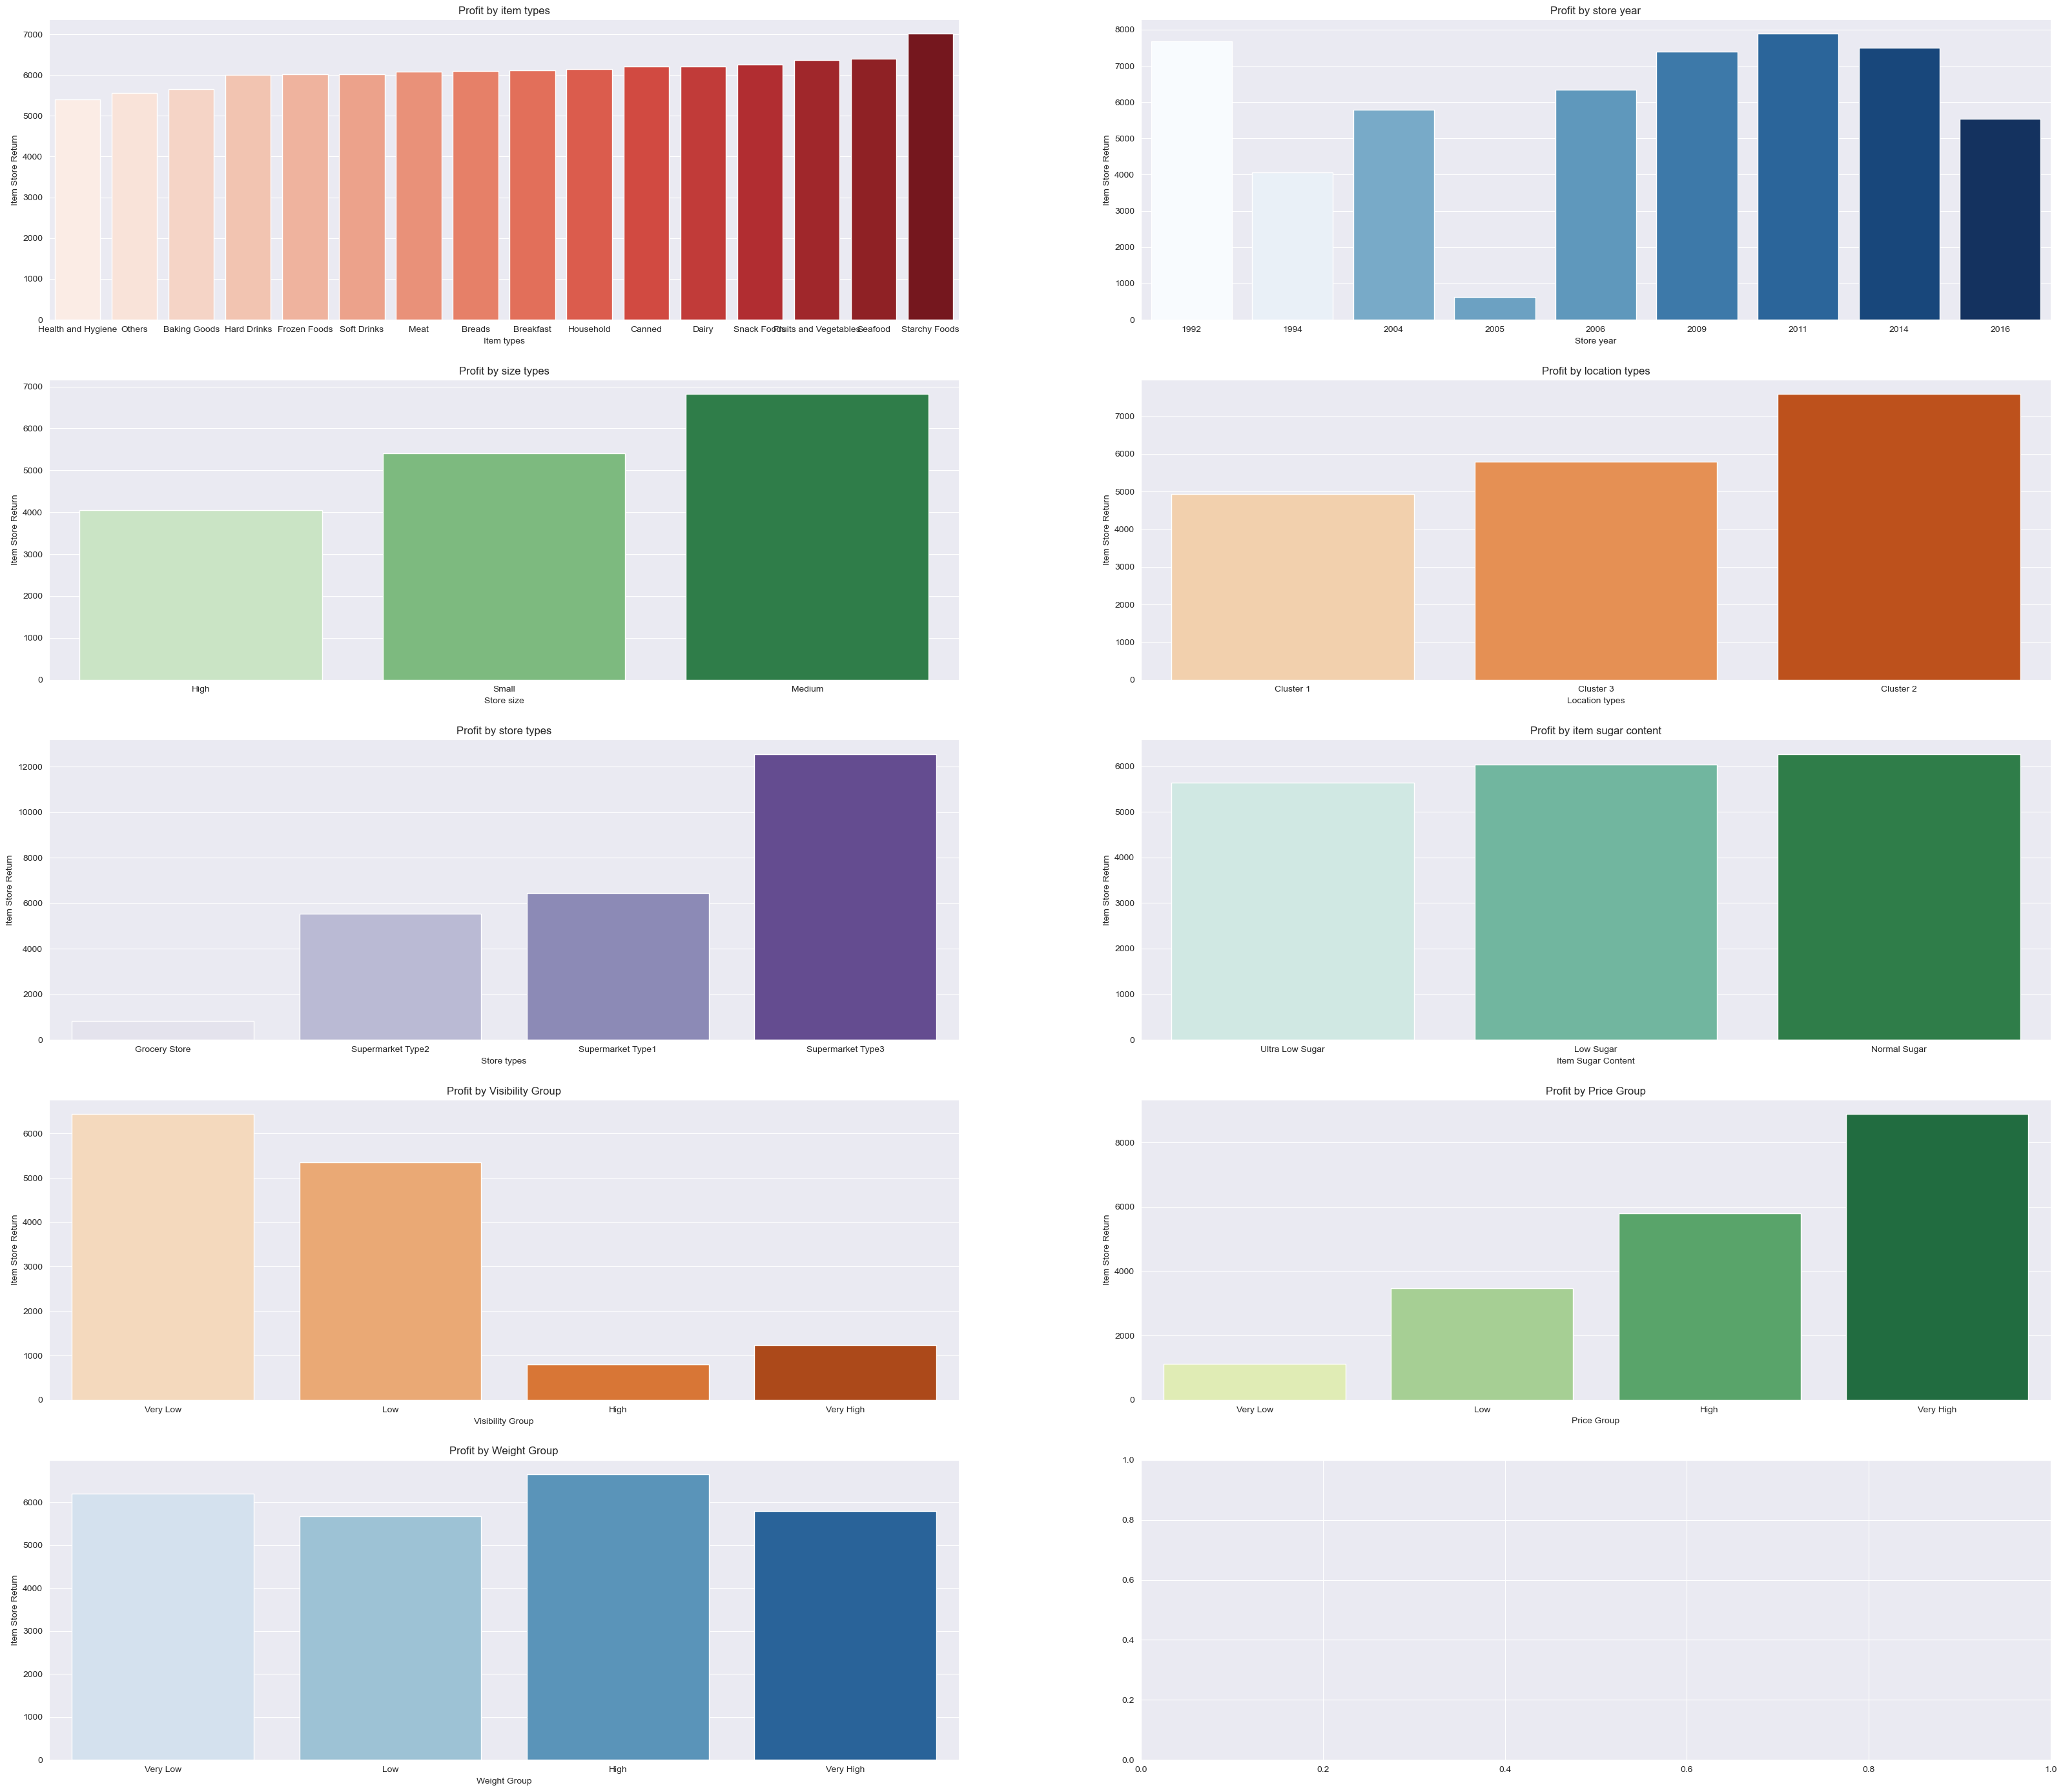

In [14]:
# Represent the above information in the form of grouped barcharts for easier understanding. 
sns.set_style("darkgrid")

# Define the figures for subplots.
fig, axes = plt.subplots(5, 2, figsize=(40, 35))  # 5 rows, 2 columns.


sns.barplot(x=profit_type.index, y=profit_type.values, hue=profit_type.index, palette="Reds", ax=axes[0, 0], legend=False)
axes[0, 0].set_title("Profit by item types")
axes[0, 0].set_xlabel("Item types")
axes[0, 0].set_ylabel("Item Store Return")

sns.barplot(x=profit_year.index, y=profit_year.values, hue=profit_year.index, palette="Blues", ax=axes[0, 1], legend=False)
axes[0, 1].set_title("Profit by store year")
axes[0, 1].set_xlabel("Store year")
axes[0, 1].set_ylabel("Item Store Return")

sns.barplot(x=profit_size.index, y=profit_size.values, hue=profit_size.index, palette="Greens", ax=axes[1, 0], legend=False)
axes[1, 0].set_title("Profit by size types")
axes[1, 0].set_xlabel("Store size")
axes[1, 0].set_ylabel("Item Store Return")

sns.barplot(x=profit_location_type.index, y=profit_location_type.values, hue=profit_location_type.index, palette="Oranges", ax=axes[1, 1], legend=False)
axes[1, 1].set_title("Profit by location types")
axes[1, 1].set_xlabel("Location types")
axes[1, 1].set_ylabel("Item Store Return")

sns.barplot(x=profit_store_type.index, y=profit_store_type.values, hue=profit_store_type.index, palette="Purples", ax=axes[2, 0], legend=False)
axes[2, 0].set_title("Profit by store types")
axes[2, 0].set_xlabel("Store types")
axes[2, 0].set_ylabel("Item Store Return")

sns.barplot(x=profit_sugar_content.index, y=profit_sugar_content.values, hue=profit_sugar_content.index, palette="BuGn", ax=axes[2, 1], legend=False)
axes[2, 1].set_title("Profit by item sugar content")
axes[2, 1].set_xlabel("Item Sugar Content")
axes[2, 1].set_ylabel("Item Store Return")

sns.barplot(x=profit_Visibility.index, y=profit_Visibility.values, hue=profit_Visibility.index, palette="Oranges", ax=axes[3, 0], legend=False)
axes[3, 0].set_title("Profit by Visibility Group")
axes[3, 0].set_xlabel("Visibility Group")
axes[3, 0].set_ylabel("Item Store Return")

sns.barplot(x=profit_price.index, y=profit_price.values, hue=profit_price.index, palette="YlGn", ax=axes[3, 1], legend=False)
axes[3, 1].set_title("Profit by Price Group")
axes[3, 1].set_xlabel("Price Group")
axes[3, 1].set_ylabel("Item Store Return")

sns.barplot(x=profit_weight.index, y=profit_weight.values, hue=profit_weight.index, palette="Blues", ax=axes[4, 0], legend=False)
axes[4, 0].set_title("Profit by Weight Group")
axes[4, 0].set_xlabel("Weight Group")
axes[4, 0].set_ylabel("Item Store Return")

plt.savefig("Data Visualization.png")

**Key Insights from the EDA:**

- **Profit by Item types**: From the profit by item types chart, we can see the the item with the most porfit is **Starchy Foods**, while the lowest is the **Health and Hygiene items**
- **Profit by Item Size**: From the item size visualization, we can deduce that the item size with the most profit is the **Medium size** which include the starchy foods, sea foods and more whule the lowestis the **High Size**.
- **Profit by Store Type**: From the store type visualization, we can deduce that the most profitable store is the **Supermarket Type3**, while the lowest is the **Grocery Store**
- **Profit by  the Visibility Group**: Note that, the item visibility group contains number that varies from 0.00-0.40, which means the lowest item visibility would  less than 0.1, while the highest should be greater than 0.40, but from the above visulaization, we can see that the visibilty group with the lowest has the highest profit.
- **Profit by Weight group**: Note that, the item weight group varies from 0-25, which means the lowest should be less than 5, while the highest should be greater then 20. From the chart above, we can deduce that the item with the highest weight is lower the item lesser than the hughest.
- **Profit by the Item Price Group**: Note that, the item price group varies from 0-700, and from the price group chart above,the highest item price has the highest profit. In otherwords, the higher the price the higher the profit and vice versa.
- **Profit by the Item Sugar Content**: From the Sugar content chart above, the item with the normal sugar tends to give the highest profit.
- **Profit by location types**: There are only 3 location types in the dataset. Out of the three location types, the Cluster 3 is the only store that stand out, which makes it, the location which the hughest profit.
- **Profit by Store Start Year**: From the store year chart, the store 2011, has the highest profit then the store 1992. 

**Correlation Analysis**

In [15]:
train_df.head(5)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Weight_Bin,Price_Bin,Visibility_Group
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08,High,High,Very Low
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,High,High,Very Low
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Medium,Cluster 2,Supermarket Type1,6381.69,High,High,Very Low
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,High,High,Very Low
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,High,High,NaN


In [16]:
train_df.head(5)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Weight_Bin,Price_Bin,Visibility_Group
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08,High,High,Very Low
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,High,High,Very Low
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Medium,Cluster 2,Supermarket Type1,6381.69,High,High,Very Low
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,High,High,Very Low
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,High,High,NaN


In [17]:
cate = ["Item_Type", "Store_Size", "Store_Location_Type", "Store_Type", "Weight_Bin", "Price_Bin", "Visibility_Group"]
dummy_variable = pd.get_dummies(train_df[cate], dtype=int)


In [18]:
train_df = pd.concat([train_df, dummy_variable], axis=1)

In [19]:
train_df.head(5)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,...,Weight_Bin_High,Weight_Bin_Very High,Price_Bin_Very Low,Price_Bin_Low,Price_Bin_High,Price_Bin_Very High,Visibility_Group_Very Low,Visibility_Group_Low,Visibility_Group_High,Visibility_Group_Very High
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,Medium,...,1,0,0,0,1,0,1,0,0,0
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,...,1,0,0,0,1,0,1,0,0,0
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Medium,...,1,0,0,0,1,0,1,0,0,0
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,...,1,0,0,0,1,0,1,0,0,0
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,...,1,0,0,0,1,0,0,0,0,0


In [20]:
train_df = train_df.drop(columns=["Weight_Bin", "Price_Bin", "Visibility_Group"])
train_df.head(5)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,...,Weight_Bin_High,Weight_Bin_Very High,Price_Bin_Very Low,Price_Bin_Low,Price_Bin_High,Price_Bin_Very High,Visibility_Group_Very Low,Visibility_Group_Low,Visibility_Group_High,Visibility_Group_Very High
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,Medium,...,1,0,0,0,1,0,1,0,0,0
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,...,1,0,0,0,1,0,1,0,0,0
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Medium,...,1,0,0,0,1,0,1,0,0,0
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,...,1,0,0,0,1,0,1,0,0,0
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,...,1,0,0,0,1,0,0,0,0,0


In [21]:
train_df1 = train_df.drop(columns=["Item_Weight", "Item_Sugar_Content", "Store_Type", "Store_Location_Type", "Item_Visibility", "Item_Type", 	"Item_Price", "Store_Size", "Item_ID", "Store_ID"])

In [22]:
train_df1.corr(numeric_only=True)["Item_Store_Returns"].sort_values(ascending=False)

Item_Store_Returns                 1.000000
Store_Type_Supermarket Type3       0.463860
Price_Bin_Very High                0.409931
Store_Location_Type_Cluster 2      0.227310
Store_Size_Medium                  0.201246
Visibility_Group_Very Low          0.117048
Store_Type_Supermarket Type1       0.106566
Weight_Bin_High                    0.099531
Store_Start_Year                   0.051297
Item_Type_Starchy Foods            0.026214
Item_Type_Fruits and Vegetables    0.024549
Item_Type_Snack Foods              0.014797
Item_Type_Canned                   0.006685
Item_Type_Dairy                    0.006507
Item_Type_Seafood                  0.006147
Item_Type_Household                0.003978
Weight_Bin_Very Low                0.001813
Item_Type_Breakfast                0.000335
Item_Type_Breads                  -0.000159
Item_Type_Meat                    -0.001040
Item_Type_Hard Drinks             -0.003565
Item_Type_Soft Drinks             -0.004038
Item_Type_Frozen Foods          

In [23]:
from scipy import stats

In [24]:
pearson_coef, p_value = stats.pearsonr(train_df['Item_Price'], train_df['Item_Store_Returns'])

In [25]:
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5182853540849366  with a P-value of P = 0.0


In [26]:
train_df1.columns
column = ['Store_Start_Year', 'Item_Store_Returns', 'Item_Type_Starchy Foods', 'Store_Location_Type_Cluster 2',
          'Store_Size_Medium', 'Item_Type_Soft Drinks', 'Weight_Bin_High', 'Price_Bin_Very High',  'Visibility_Group_Very Low',
          'Store_Type_Supermarket Type3']

In [27]:
corr_matrix = train_df1[column].corr(numeric_only=True)

<Axes: >

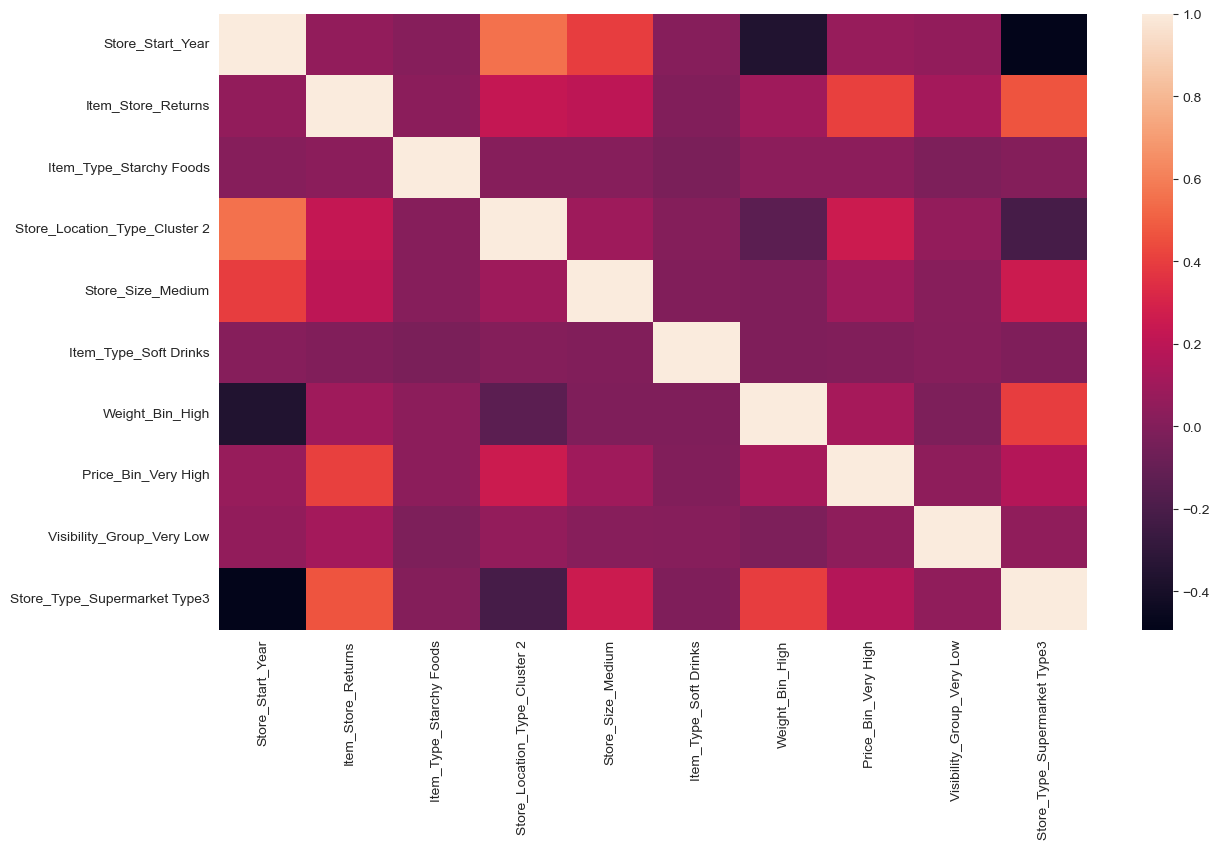

In [28]:
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix)

# Model Development

In [29]:
lm = LinearRegression()

X_train = train_df[["Item_Price"]]
y_train = train_df[["Item_Store_Returns"]]


lm.fit(X_train, y_train)



LinearRegression()

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Optimize model parameters
parameters_1 = [{"alpha": [0.002, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]
RR = Ridge() 
Grid1 = GridSearchCV(RR, parameters_1, cv=4)
Grid1.fit(X_train, y_train)
Grid1.best_estimator_
scores = Grid1.cv_results_
scores["mean_test_score"]

array([0.26802636, 0.26802636, 0.26802636, 0.26802636, 0.26802636,
       0.26802636, 0.26802633, 0.26802522, 0.26793313])

In [32]:
X_test = test_df[["Item_Price"]]
yhat = lm.predict(X_test)

In [33]:
data = {
    "Item_Store_ID": test_df["Item_Store_ID"],
    "Item_Store_Returns": yhat.flatten()
}
submission = pd.DataFrame(data)

In [34]:
submission.head(5)

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,7419.884916
1,DRA59_BABATUNJI013,7516.426280
2,DRB01_BABATUNJI013,7755.848862
3,DRB13_BABATUNJI010,7664.134566
4,DRB13_BABATUNJI013,7673.788703


In [35]:
submission.to_csv("submission.csv", index=False)